In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Project_reviews/UserCono.csv",encoding='latin1')

data.columns = ["Conversation","name"]

data.head(10)

,Conversation,name
0,"Dopey Sugar @ Lord_Sugarâif you were smart, ...",User 1
1,". @ Lord_Sugarâwindfarms are expensive, need...",User 1
2,Dopey Sugar @ Lord_Sugarâyou are the worst k...,User 1
3,I just bought stock in Tiffany & Company and M...,User 1
4,@ Lord_Sugar Dopey Sugar--because it was open ...,User 1
5,Dopey Sugar @ Lord_Sugar The people in the UK ...,User 1
6,Dopey Sugar @ Lord_Sugar I can't believe you w...,User 1
7,My @ foxandfriends interview discussing the Gr...,User 1
8,Watch @ davidaxelrod shave his mustache on @ M...,User 1
9,"""Donald Trump, king of timely Internet soundbi...",User 1


User 1    38.462722
User 2    38.462722
User 3    23.074556
Name: name, dtype: float64


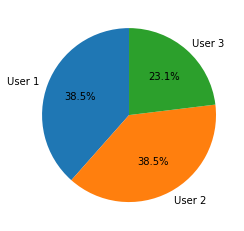

In [ ]:
f=data['name'].value_counts()
print((f*100)/f.sum())
plt.pie(f,labels=data['name'].unique(),autopct='%1.1f%%',startangle=90)
plt.show()

In [ ]:
print("Number of duplicates before dropping: ",data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Number of duplicates after dropping: ",data.duplicated().sum())

Number of duplicates before dropping:  13
Number of duplicates after dropping:  0


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
REPLACE_WITH_SPACE = re.compile("(@)")
SPACE = " "
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')
from nltk.stem.porter import PorterStemmer

def reviews(reviews):  
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, str(line)) for line in reviews]
    
    return reviews

def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split()  if word not in english_stop_words]))
    return removed_stop_words

def get_stemmed_text(corpus):
    stemmer = PorterStemmer()

    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

In [ ]:
convo_t = data["Conversation"]

target = data['name']

#1
reviewt = reviews(convo_t)
#2
no_stop_words_t = remove_stop_words(reviewt)
#3
stemmed_reviews_t = get_stemmed_text(no_stop_words_t)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(stemmed_reviews_t)
X = tfidf_vectorizer.transform(stemmed_reviews_t)
#X_test = tfidf_vectorizer.transform(stemmed_reviews_test)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, target, train_size = 0.8)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

text_classifier = RandomForestClassifier(n_estimators=50, random_state=0)
text_classifier.fit(X_train, y_train)

y_pred=text_classifier.predict(X_val)
print("y_pred: \n",y_pred)
print(classification_report(y_val,y_pred))

y_pred: 
 ['User 1' 'User 2' 'User 2' ... 'User 2' 'User 1' 'User 2']
              precision    recall  f1-score   support

      User 1       0.85      0.97      0.91       990
      User 2       0.95      0.96      0.96      1004
      User 3       0.93      0.71      0.81       603

    accuracy                           0.91      2597
   macro avg       0.91      0.88      0.89      2597
weighted avg       0.91      0.91      0.90      2597



In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50,), random_state=1,max_iter=1000)

In [ ]:
clf.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50,), max_iter=1000,
              random_state=1)

In [ ]:
prediction = clf.predict(X_val)
print(classification_report(y_val,prediction))

              precision    recall  f1-score   support

      User 1       0.95      0.96      0.95       990
      User 2       0.97      0.98      0.97      1004
      User 3       0.93      0.91      0.92       603

    accuracy                           0.95      2597
   macro avg       0.95      0.95      0.95      2597
weighted avg       0.95      0.95      0.95      2597



In [ ]:
data['label_id'] = data['name'].factorize()[0]
cat_id = data[['name', 'label_id']].drop_duplicates().sort_values('label_id')
cat_to_id = dict(cat_id.values)
id_to_cat = dict(cat_id[['label_id', 'name']].values)

#show data id_to_category
id_to_cat

{0: 'User 1', 1: 'User 2', 2: 'User 3'}

In [ ]:
label = data['label_id'].values
text = data['Conversation'].values

print('Value of [label]:', label, "\n")
print('Value of [text]:', text)

Value of [label]: [0 0 0 ... 2 2 2] 

Value of [text]: ['Dopey Sugar @ Lord_Sugarâ\x80\x94if you were smart, which you are not, you would oppose the monstrous windfarms that will destroy your country.'
 '. @ Lord_Sugarâ\x80\x94windfarms are expensive, need subsidy,kill birds & destroy country & waterway beauty. Also, very unreliable & expensive energy.'
 'Dopey Sugar @ Lord_Sugarâ\x80\x94you are the worst kind of loserâ\x80\x94a total fool.'
 ... 'Now with actual picture :) http://t.co/G6PCiAJmtx'
 'Cool picture of Io crossing Jupiter sent to me by @shervin. Would be amazing to visit in person one day.'
 "Congratulations to @OrbitalSciences! ?@CNETNews: Orbital's Antares rocket makes successful test flight http://t.co/y7bwdDMGCi?"]


In [ ]:
maxfeatures = 10000

#tokenization
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = maxfeatures)
for i in range(len(text)):
  text[i] = str(text[i])
  
tokenizer.fit_on_texts(text)

In [ ]:
maxseqlen = max([len(i.split()) for i in text])
print(maxseqlen)

59


In [ ]:
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

X = tokenizer.texts_to_sequences(text)
X = pad_sequences(X, maxseqlen)
y = to_categorical(label, num_classes = 3)

print("Shape of data tensor ['text']:", X.shape)
print("Shape of data tensor ['label']:", y.shape)

Shape of data tensor ['text']: (12984, 59)
Shape of data tensor ['label']: (12984, 3)


In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(10387, 59) (10387, 3)
(2597, 59) (2597, 3)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Embedding, Dense, GlobalMaxPool1D
from keras.optimizers import RMSprop

model = Sequential()
model.add(Embedding(input_dim = maxfeatures, output_dim = 128, input_length = maxseqlen))
model.add(LSTM(128, return_sequences = True))
model.add(GlobalMaxPool1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))


opt = RMSprop(learning_rate=0.0012, rho=0.7, momentum=0.5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 59, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 59, 128)           131584    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                        

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 3)

In [ ]:
history = model.fit(Xtrain, ytrain,batch_size = 100, epochs = 20, shuffle = True,validation_split = 0.15, verbose = 1,callbacks=early_stop)

Epoch 1/20
89/89 [==============================] - 24s 244ms/step - loss: 0.6589 - accuracy: 0.7022 - val_loss: 0.3357 - val_accuracy: 0.8691
Epoch 2/20
89/89 [==============================] - 19s 210ms/step - loss: 0.2266 - accuracy: 0.9129 - val_loss: 0.1960 - val_accuracy: 0.9294
Epoch 3/20
89/89 [==============================] - 19s 208ms/step - loss: 0.1288 - accuracy: 0.9531 - val_loss: 0.3116 - val_accuracy: 0.9096
Epoch 4/20
89/89 [==============================] - 19s 210ms/step - loss: 0.0935 - accuracy: 0.9681 - val_loss: 0.2094 - val_accuracy: 0.9352
Epoch 5/20
89/89 [==============================] - 19s 208ms/step - loss: 0.0660 - accuracy: 0.9764 - val_loss: 0.2254 - val_accuracy: 0.9333
Epoch 6/20
89/89 [==============================] - 19s 209ms/step - loss: 0.0525 - accuracy: 0.9830 - val_loss: 0.2381 - val_accuracy: 0.9468
Epoch 7/20
89/89 [==============================] - 19s 211ms/step - loss: 0.0419 - accuracy: 0.9860 - val_loss: 0.2550 - val_accuracy: 0.9416

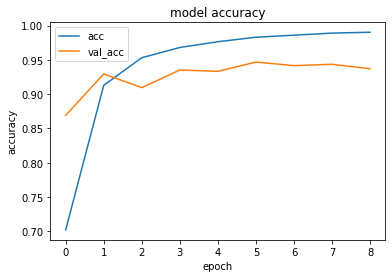

In [ ]:
plt.plot (history.history['accuracy'])
plt.plot (history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

def evaluation(model, X, Y):
  global Y_pred, Y_act
  Y_pred = model.predict(X)
  Y_pred_class = np.argmax(Y_pred, axis=1)
  rounded_labels=np.argmax(Y, axis=1)
  Y_act = rounded_labels
  
  accuracy = accuracy_score(Y_act, Y_pred_class)
  return accuracy

accuracy = evaluation(model, Xtest, ytest)
print('accuracy: %.3f' % (accuracy * 100), '%')

82/82 [==============================] - 3s 35ms/step
accuracy: 91.798 %


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

target = ["U1","U2","U3"]
print(confusion_matrix(Y_act, np.argmax(Y_pred, axis=1)))
print(classification_report(Y_act, np.argmax(Y_pred, axis = 1), target_names = target))

[[936  22  61]
 [ 33 943  13]
 [ 53  31 505]]
              precision    recall  f1-score   support

          U1       0.92      0.92      0.92      1019
          U2       0.95      0.95      0.95       989
          U3       0.87      0.86      0.86       589

    accuracy                           0.92      2597
   macro avg       0.91      0.91      0.91      2597
weighted avg       0.92      0.92      0.92      2597



In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
  

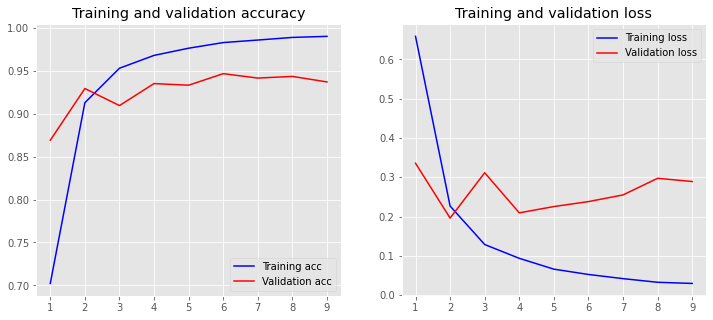

In [ ]:
plot_history(history)